In [120]:
##Importing the libraries

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

##Open the dataset

df = pd.read_csv("./Group-project-DataScience-GroupD.csv", sep=";") #Passing the path and the right separator

df #Displaying the dataset to ensure proper opening

##First, we are going to print the dimensions of our dataset

print(f"The number of row of the dataset is: {df.shape[0]}") 
print(f"The number of columns of the dataset is: {df.shape[1]}")

print("The number of rows and columns of the dataset is coherent with our excel, highlighting proper opening and reading of the file")



The number of row of the dataset is: 1345
The number of columns of the dataset is: 9
The number of rows and columns of the dataset is coherent with our excel, highlighting proper opening and reading of the file


In [121]:
##After opening the dataset, we are going to do a check on the variable type

print("The types of the variables are:\n")

print(df.info())

The types of the variables are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Date                                1345 non-null   object
 1   M2 Money Supply (Bn)                1345 non-null   object
 2   S&P 500 Index                       1345 non-null   object
 3   US Dollar Index                     1345 non-null   object
 4   Federal Funds Effective Rate (DFF)  1345 non-null   object
 5   Gold Futures                        1345 non-null   object
 6   Crude Oil Futures                   1345 non-null   object
 7   BTC/USD Index                       795 non-null    object
 8   CBOE Volatility Index (VIX)         1345 non-null   object
dtypes: object(9)
memory usage: 94.7+ KB
None


In [122]:
## To put in the report:
## After displaying the variables type, we realised that they were all read as objects by python. When variables are read as string, it will be more
## complicated to do mathematical operations on them. In order to overcome this issue, all variables were transformed as float and the date was
## transformed as a datetime type.
## Moreover, to better execute operations, we did the following modification:
## - Elimination of '$'
## - Elimination of '%'
## - Replacement of the comma (used as decimal separator) with a period

In [123]:
colswithdoll = ['M2 Money Supply (Bn)', 'S&P 500 Index', 'US Dollar Index', 'Gold Futures',
             'Crude Oil Futures', 'BTC/USD Index', 'CBOE Volatility Index (VIX)']
colwithper = ['Federal Funds Effective Rate (DFF)']

df[colswithdoll] = df[colswithdoll].apply(lambda x: x.str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

df[colwithper] = df[colwithper].apply(lambda s: s.str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
    / 100
)

df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [124]:
## Let's try to print the new type:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                1345 non-null   datetime64[ns]
 1   M2 Money Supply (Bn)                1345 non-null   float64       
 2   S&P 500 Index                       1345 non-null   float64       
 3   US Dollar Index                     1345 non-null   float64       
 4   Federal Funds Effective Rate (DFF)  1345 non-null   float64       
 5   Gold Futures                        1345 non-null   float64       
 6   Crude Oil Futures                   1345 non-null   float64       
 7   BTC/USD Index                       795 non-null    float64       
 8   CBOE Volatility Index (VIX)         1345 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 94.7 KB
None


In [125]:
## Let's try to see if all the modifications have been done

display(df.head())

,Date,M2 Money Supply (Bn),S&P 500 Index,US Dollar Index,Federal Funds Effective Rate (DFF),Gold Futures,Crude Oil Futures,BTC/USD Index,CBOE Volatility Index (VIX)
0,2025-10-05,22243.7,6552.51,98.98,0.0409,4000.4,58.90,110671.5,21.66
1,2025-09-28,22092.7,6715.79,97.72,0.0409,3908.9,60.88,122387.1,16.65
2,2025-09-21,22082.5,6643.70,98.15,0.0419,3793.9,65.14,109652.8,15.29
3,2025-09-14,22197.4,6664.36,97.64,0.0433,3692.4,62.68,115699.2,15.45
4,2025-09-07,22159.7,6584.29,97.55,0.0433,3673.3,62.69,115924.9,14.76


In [126]:
## All the data has been correctly modified

In [127]:
#Let's do some cleaning now

df.isna().sum().sort_values(ascending = False)

BTC/USD Index                         550
Date                                    0
M2 Money Supply (Bn)                    0
US Dollar Index                         0
S&P 500 Index                           0
Federal Funds Effective Rate (DFF)      0
Gold Futures                            0
Crude Oil Futures                       0
CBOE Volatility Index (VIX)             0
dtype: int64

In [128]:
## To put in the report:
## We can see that our dataset contains 550 missing values for the "BTC/USD Index". This is an issue that we were totally
## expecting, as bitcoin has been created after the beginning date of our dataset.

In [129]:
## (To integrate with nick's charts)

## Let's do some EDA

## Let's first import the libraries

import matplotlib.pyplot as plt
import seaborn as sns

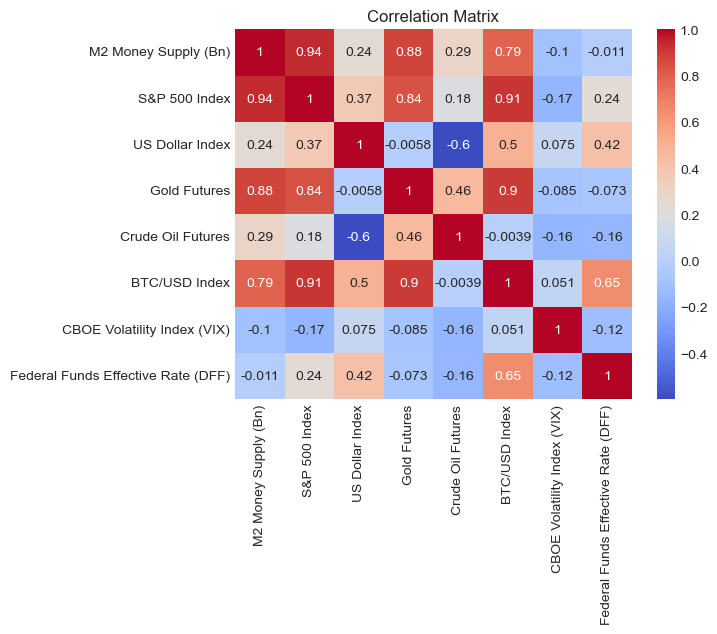

In [130]:
## Firstly, we are going to give a look at the correlation matrix to see if there is some correlation between the variables of our dataset
## We are not going to consider the date, as we are going to do some time series graphs in a second time

num_cols =  ["M2 Money Supply (Bn)", "S&P 500 Index", "US Dollar Index", "Gold Futures",
             "Crude Oil Futures", "BTC/USD Index", "CBOE Volatility Index (VIX)", "Federal Funds Effective Rate (DFF)"]

sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [131]:
## We printed the correlation matrix for the absolute values of our dataset. (To write better in the report) : however in our dataset we have 
## mainly time series, and this may lead to some problem of spurious correlation. In order to overcome this issue, and also beacasue when comparing
## different assets it makes more sense, we are going to convert all our values in % changes

In [132]:
time_col = 'Date'

df_temp = df.sort_values(by=time_col, ascending=True).copy() ## We do a temporary dataset where we sort the date from the oldest to the newest

## This is a necessary step beacause of how the pct_change works in python. In fact, to compute the % change this is the formula: 
## p(t) - p(t-1) / p(t-1). In python this means (current row - previous row) / (previous row). The problem with our dataset is that
## we have the dates in descending order so we invert the calculation
## EX : if we keep our original dataset we would  have for example that for row1 we would do (2025-09-28)-(2025-10-05) / (2025-10-05), which is a 
## mistake. That's why the first step is to invert our dataset.

df_returns = df_temp[num_cols].pct_change() * 100 ## We compute the percentage changes

df_returns.insert(0, TIME_COLUMN, df_temp[TIME_COLUMN].values) ## Add the "date" columns to the new dataset

df_returns_final = df_returns.sort_values(by=TIME_COLUMN, ascending=False).reset_index(drop=True) ## We put back the original order

df_returns_final

,Date,M2 Money Supply (Bn),S&P 500 Index,US Dollar Index,Gold Futures,Crude Oil Futures,BTC/USD Index,CBOE Volatility Index (VIX),Federal Funds Effective Rate (DFF)
0,2025-10-05,0.683484,-2.431285,1.289398,2.340812,-3.252300,-9.572578,30.090090,0.000000
1,2025-09-28,0.046190,1.085088,-0.438105,3.031182,-6.539761,11.613292,8.894702,-2.386635
2,2025-09-21,-0.517628,-0.310007,0.522327,2.748890,3.924697,-5.225965,-1.035599,-3.233256
3,2025-09-14,0.170129,1.216076,0.092260,0.519968,-0.015952,-0.194695,4.674797,0.000000
4,2025-09-07,0.007221,1.585898,-0.225018,0.914835,1.325360,5.200355,-2.766798,0.000000
...,...,...,...,...,...,...,...,...,...
1340,2000-01-30,-0.369622,4.719894,-0.181853,9.440559,5.878031,NaN,-17.597552,1.277372
1341,2000-01-23,-0.771921,-5.633412,2.672956,-1.277183,-3.475177,NaN,25.552354,-2.142857
1342,2000-01-16,-0.234013,-1.624352,0.039324,1.684802,0.642398,NaN,5.900305,1.633394
1343,2000-01-09,0.038308,1.644121,0.912698,0.706964,15.689513,NaN,-9.484346,21.902655


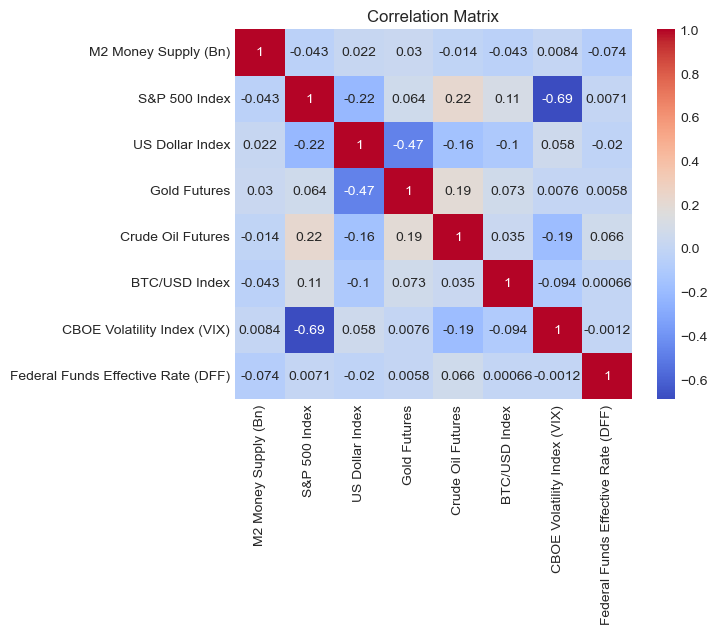

In [133]:
sns.heatmap(df_returns_final[num_cols].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [98]:
## Now, let's plot some qq plots to understand if our variables follow a normal distribution

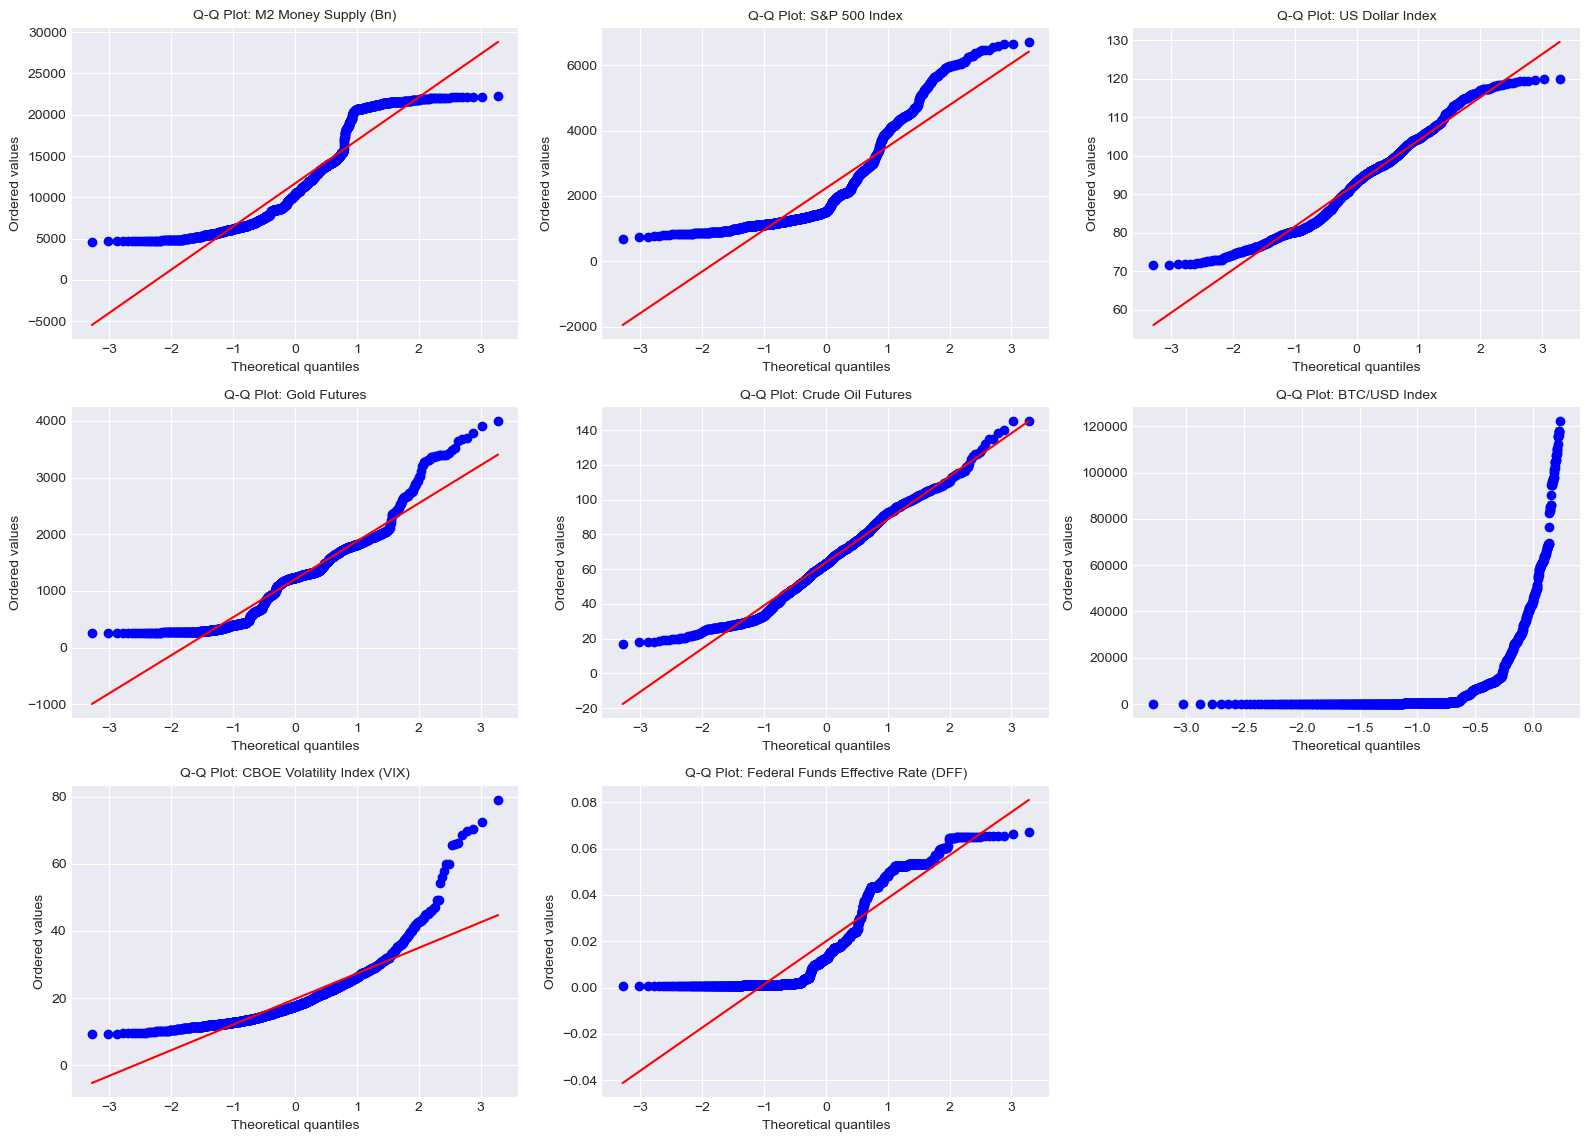

In [99]:
from scipy import stats
import math

num_variables = len(num_cols)
cols_per_row = 3 
rows = math.ceil(num_variables / cols_per_row)

# Creating the tab for visualisation

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
axes = axes.flatten()

## Plot

for i, col in enumerate(num_cols):
    ax = axes[i] 
    stats.probplot(df[col], dist="norm", plot=ax)
    ax.set_title(f"Q-Q Plot: {col}", fontsize=10)
    ax.set_xlabel("Theoretical quantiles")
    ax.set_ylabel("Ordered values")
    
for j in range(num_variables, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()